In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [9]:
data = pd.read_csv('creditcard.csv')

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Text(0, 0.5, 'Fraudulent Transaction   Non-Fraudulent Transaction')

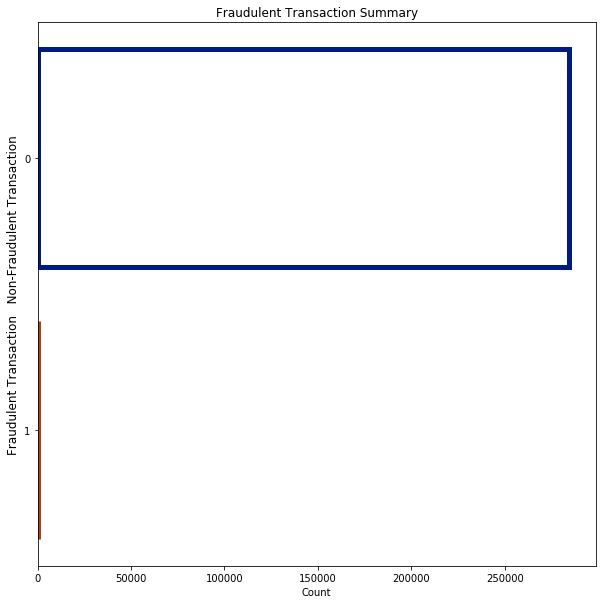

In [13]:
# Next, Class feature will be examined.
plt.figure(figsize=(10,10))
sns.countplot(
    y="Class", 
    data=data,
    facecolor=(0, 0, 0, 0),
    linewidth=5, 
    edgecolor=sns.color_palette("dark", 2))

plt.title('Fraudulent Transaction Summary')
plt.xlabel('Count')
plt.ylabel('Fraudulent Transaction   Non-Fraudulent Transaction', fontsize=12)

In [14]:
data_value= data["Class"].value_counts()

In [15]:
print(data_value)
print(data_value/284807)

0    284315
1       492
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


In [16]:
data['Class']= data['Class'].astype('category')

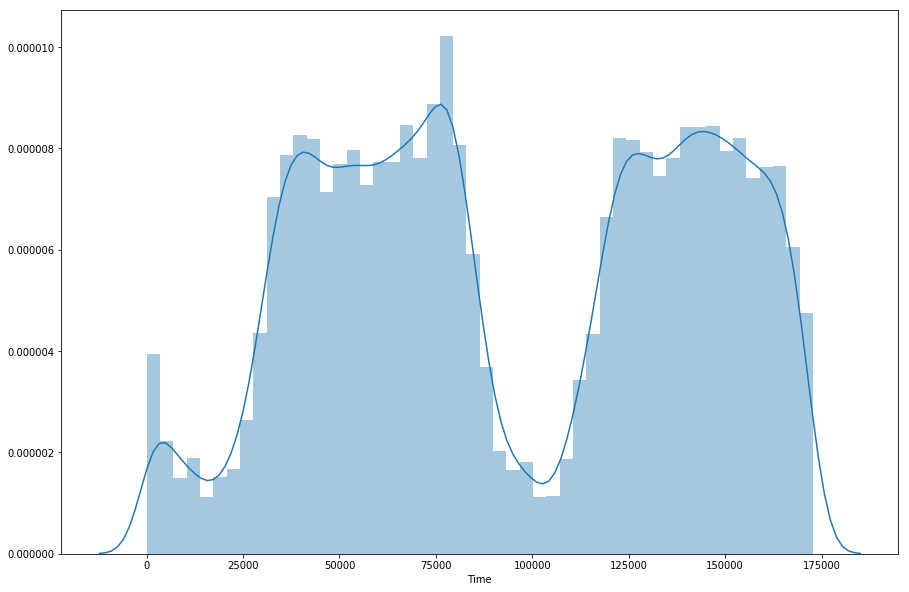

In [17]:
#Distribution of Time
plt.figure(figsize=(15,10))
sns.distplot(data['Time'])

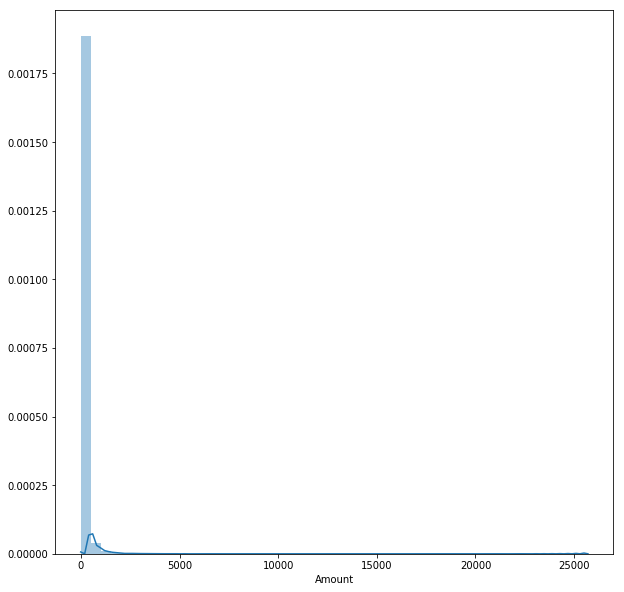

In [21]:
#Distribution of Amount
plt.figure(figsize=(10,10))
sns.distplot(data['Amount'])

In [22]:
data['Hour'] = data['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)

In [23]:
#Class vs Amount vs Hour
pd.pivot_table(
    columns="Class", 
    index="Hour", 
    values= 'Amount', 
    aggfunc='count', 
    data=data)

Class,0,1
Hour,,
0.0,10919,21
1.0,7687,6
2.0,4212,10
3.0,3269,57
4.0,3476,17
5.0,2185,23
6.0,2979,11
7.0,4093,9
8.0,7219,23


Text(0.5, 1.0, 'Fraudulent Transaction')

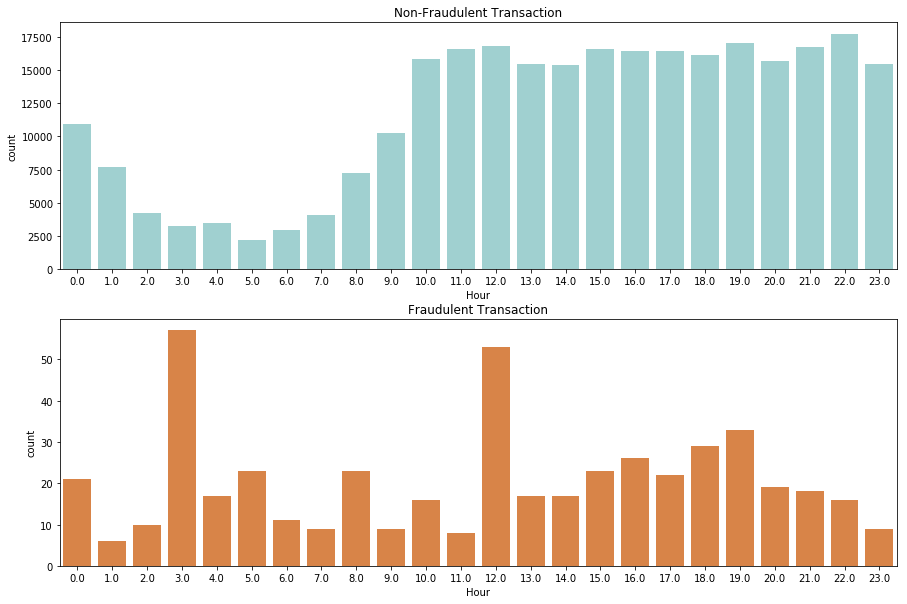

In [24]:
#Hour vs Class
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

sns.countplot(
    x="Hour",
    data=data[data['Class'] == 0], 
    color="#98D8D8",  
    ax=axes[0])
axes[0].set_title("Non-Fraudulent Transaction")


sns.countplot(
    x="Hour",
    data=data[data['Class'] == 1],
    color="#F08030", 
    ax=axes[1])
axes[1].set_title("Fraudulent Transaction")

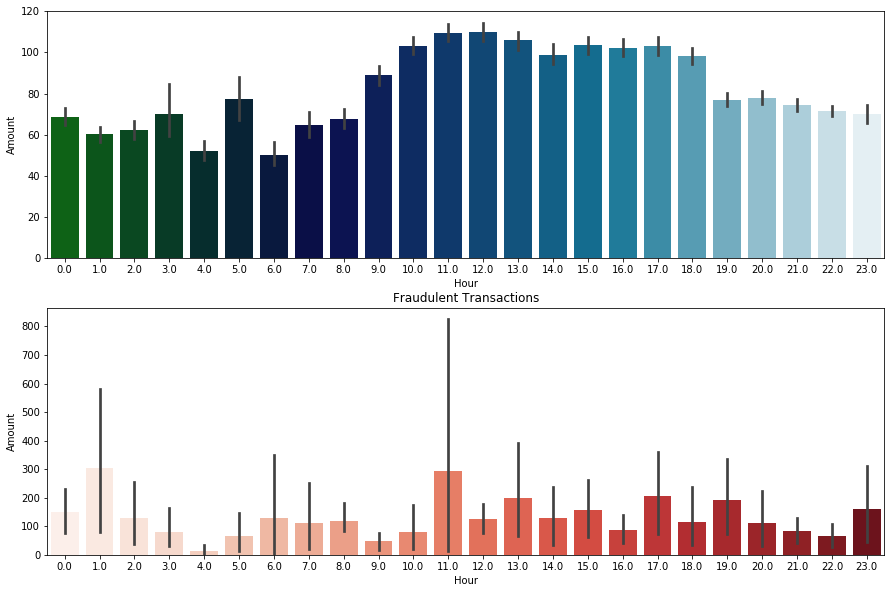

In [25]:
#Amount vs Hour vs Class
fig, axees = plt.subplots(2, 1, figsize=(15, 10))

plt.title("Non-Fraudulent Transactions")
sns.barplot(
    x='Hour',
    y='Amount', 
    data=data[data['Class'] == 0], 
    palette="ocean", 
    ax=axees[0])

plt.title("Fraudulent Transactions")
sns.barplot(
    x='Hour', 
    y='Amount', 
    data=data[data['Class'] == 1], 
    palette="Reds", 
    ax=axees[1])

In [26]:
#Drop hour feature before continues next analysis.
data=data.drop(['Hour'], axis=1)

In [27]:
data_nonfraud = data[data['Class'] == 0].sample(2000)
data_fraud  = data[data['Class'] == 1]

data_new = data_nonfraud.append(data_fraud).sample(frac=1)
X = data_new.drop(['Class'], axis = 1).values
y = data_new['Class'].values

In [28]:
tsne = TSNE(n_components=2, random_state=42)
X_transformation = tsne.fit_transform(X)

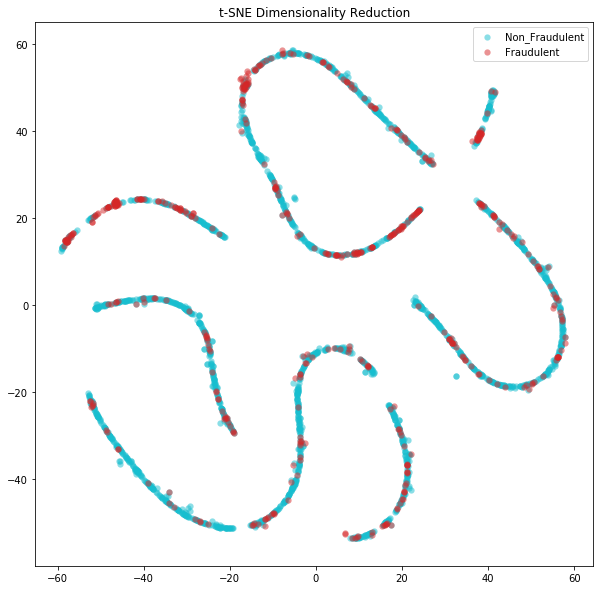

In [29]:
plt.figure(figsize=(10, 10))
plt.title("t-SNE Dimensionality Reduction")

def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Non_Fraudulent", alpha=0.5, linewidth=0.15, c='#17becf')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Fraudulent", alpha=0.5, linewidth=0.15, c='#d62728')
    plt.legend()
    return plt.show()

plot_data(X_transformation, y)

In [30]:
data[['Time', 'Amount']] = StandardScaler().fit_transform(data[['Time', 'Amount']])

In [31]:
corr=data.corr(method='pearson')

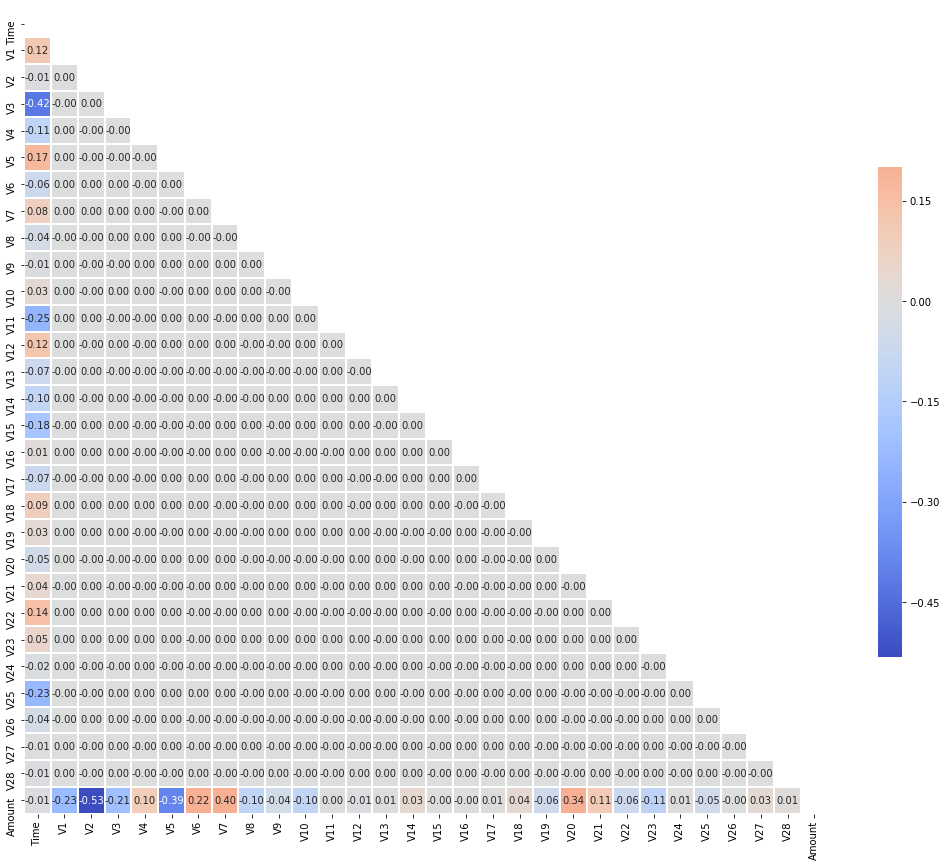

In [32]:
plt.figure(figsize=(18, 18))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
    corr, 
    xticklabels=corr.columns,
    yticklabels=corr.columns, 
    cmap="coolwarm", 
    annot=True, 
    fmt=".2f",
    mask=mask, 
    vmax=.2, 
    center=0,
    square=True, 
    linewidths=1, 
    cbar_kws={"shrink": .5})

In [33]:
# First train and label data created. 
train_data, label_data = data.iloc[:,:-1],data.iloc[:,-1]

#Convert to matrix
data_dmatrix = xgb.DMatrix(data=train_data, label= label_data)

In [34]:
#Split data randomly to train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(
                                    train_data, label_data, test_size=0.3,random_state=42)

[23:50:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[23:50:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[23:50:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[23:50:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[23:50:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[23:50:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[23:50:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

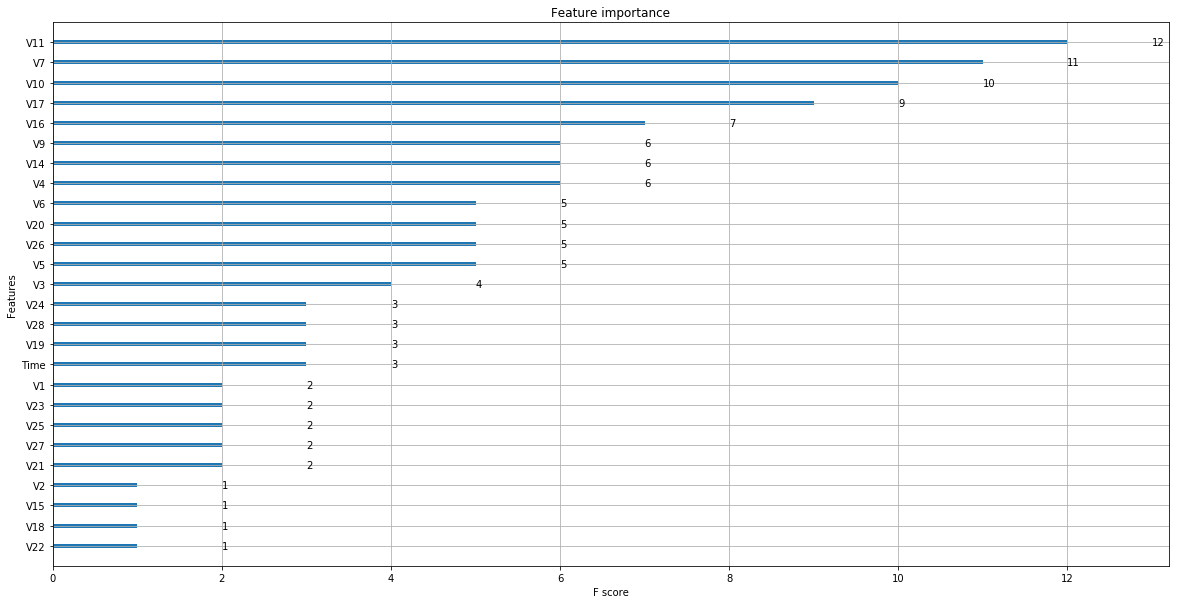

In [35]:
params = {
    'objective':'reg:logistic',
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'bootstrap': True, 
    'criterion': 'gini', 
    'max_depth': 4, 
    'max_features': 'auto', 
    'n_estimators': 50
}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

#Feature importance graph
plt.rcParams['figure.figsize'] = [20, 10]
xgb.plot_importance(xg_reg)

In [36]:
data_model = data.drop(['V13', 'V25', 'Time', 'V20', 'V22', 'V8', 'V15', 'V19', 'V2'], axis=1)

In [37]:
data_under_nonfraud = data_model[data_model['Class'] == 0].sample(15000)
data_under_fraud  = data_model[data_model['Class'] == 1]

data_undersampling = data_under_nonfraud.append(data_under_fraud, 
                                                ignore_index=True, sort=False)

Text(0, 0.5, 'Fraudulent Transaction,        Non-Fraudulent Transaction')

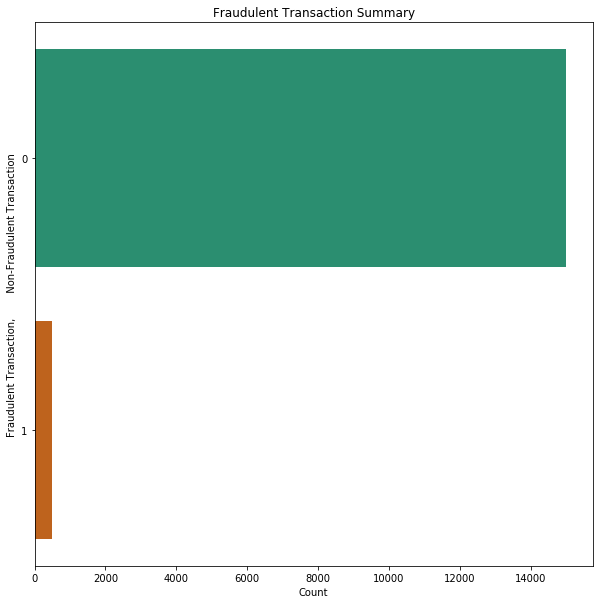

In [38]:
plt.figure(figsize=(10,10))
sns.countplot(y="Class", data=data_undersampling,palette='Dark2')
plt.title('Fraudulent Transaction Summary')
plt.xlabel('Count')
plt.ylabel('Fraudulent Transaction,        Non-Fraudulent Transaction')

In [39]:
# New data will be split randomly to train and test subsets. Train data proportion is 70% and the test data proportion is 30%.

model_train, model_label = data_undersampling.iloc[:,:-1],data_undersampling.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
                                        model_train, model_label, test_size=0.3, random_state=42)

In [40]:
#5-fold Cross Validation method will be used.

kfold_cv=KFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in kfold_cv.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [41]:
# Define the model as the Random Forest
modelRF = RandomForestClassifier(
    n_estimators=500, 
    criterion = 'gini', 
    max_depth = 4, 
    class_weight='balanced', 
    random_state=42
).fit(X_train, y_train)

# Obtain predictions from the test data 
predict_RF = modelRF.predict(X_test)

In [42]:
# Define the model as the Support Vector Machine
modelSVM = svm.SVC(
    kernel='rbf', 
    class_weight='balanced', 
    gamma='scale', 
    probability=True, 
    random_state=42
).fit(X_train, y_train)

# Obtain predictions from the test data 
predict_SVM = modelSVM.predict(X_test)

In [43]:
# Define the model as the Logistic Regression
modelLR = LogisticRegression(
    solver='lbfgs', 
    multi_class='multinomial',
    class_weight='balanced', 
    max_iter=500, 
    random_state=42
).fit(X_train, y_train)

# Obtain predictions from the test data 
predict_LR = modelLR.predict(X_test)

In [44]:
# Define the model as the Multilayer Perceptron
modelMLP = MLPClassifier(
    solver='lbfgs', 
    activation='logistic', 
    hidden_layer_sizes=(100,),
    learning_rate='constant', 
    max_iter=1500, 
    random_state=42
).fit(X_train, y_train)

# Obtain predictions from the test data 
predict_MLP = modelMLP.predict(X_test)

In [45]:
RF_matrix = confusion_matrix(y_test, predict_RF)
SVM_matrix = confusion_matrix(y_test, predict_SVM)
LR_matrix = confusion_matrix(y_test, predict_LR)
MLP_matrix = confusion_matrix(y_test, predict_MLP) 

[Text(0.5, 0, 'Non-Fraud'), Text(1.5, 0, 'Fraud')]

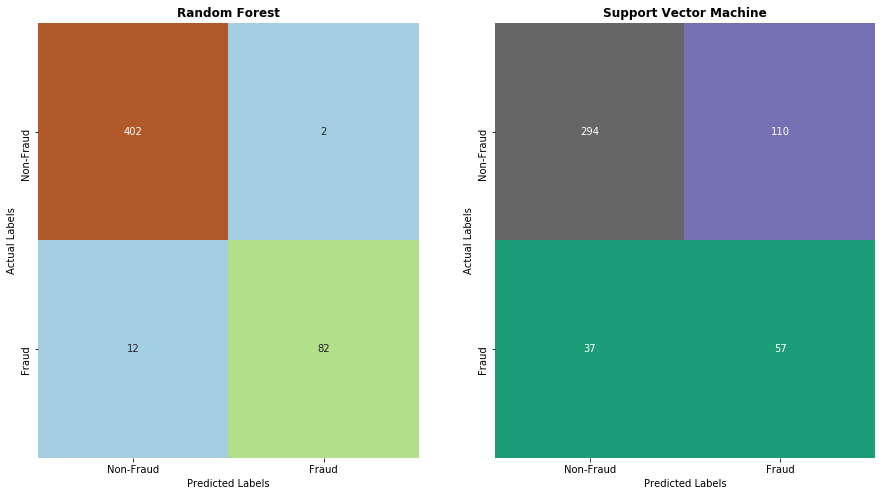

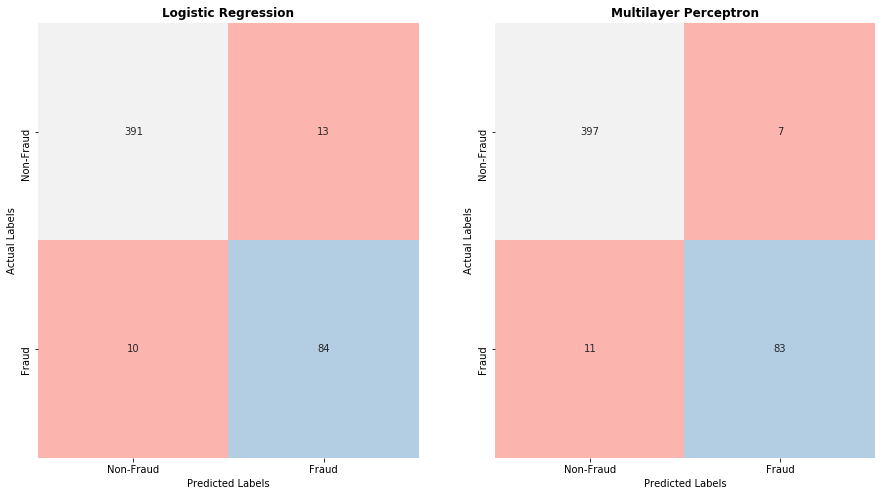

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.heatmap(RF_matrix, annot=True, fmt="d",cbar=False, cmap="Paired", ax = ax[0])
ax[0].set_title("Random Forest", weight='bold')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('Actual Labels')
ax[0].yaxis.set_ticklabels(['Non-Fraud', 'Fraud'])
ax[0].xaxis.set_ticklabels(['Non-Fraud', 'Fraud'])

sns.heatmap(SVM_matrix, annot=True, fmt="d",cbar=False, cmap="Dark2", ax = ax[1])
ax[1].set_title("Support Vector Machine", weight='bold')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('Actual Labels')
ax[1].yaxis.set_ticklabels(['Non-Fraud', 'Fraud'])
ax[1].xaxis.set_ticklabels(['Non-Fraud', 'Fraud'])


fig, axe = plt.subplots(1, 2, figsize=(15, 8))

sns.heatmap(LR_matrix, annot=True, fmt="d",cbar=False, cmap="Pastel1", ax = axe[0])
axe[0].set_title("Logistic Regression", weight='bold')
axe[0].set_xlabel('Predicted Labels')
axe[0].set_ylabel('Actual Labels')
axe[0].yaxis.set_ticklabels(['Non-Fraud', 'Fraud'])
axe[0].xaxis.set_ticklabels(['Non-Fraud', 'Fraud'])

sns.heatmap(MLP_matrix, annot=True, fmt="d",cbar=False, cmap="Pastel1", ax = axe[1])
axe[1].set_title("Multilayer Perceptron", weight='bold')
axe[1].set_xlabel('Predicted Labels')
axe[1].set_ylabel('Actual Labels')
axe[1].yaxis.set_ticklabels(['Non-Fraud', 'Fraud'])
axe[1].xaxis.set_ticklabels(['Non-Fraud', 'Fraud'])

In [47]:
print("Classification_RF:")
print(classification_report(y_test, predict_RF))
print("Classification_SVM:")
print(classification_report(y_test, predict_SVM))
print("Classification_LR:")
print(classification_report(y_test, predict_LR))
print("Classification_MLP:")
print(classification_report(y_test, predict_MLP))

Classification_RF:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       404
           1       0.98      0.87      0.92        94

   micro avg       0.97      0.97      0.97       498
   macro avg       0.97      0.93      0.95       498
weighted avg       0.97      0.97      0.97       498

Classification_SVM:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       404
           1       0.34      0.61      0.44        94

   micro avg       0.70      0.70      0.70       498
   macro avg       0.61      0.67      0.62       498
weighted avg       0.78      0.70      0.73       498

Classification_LR:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       404
           1       0.87      0.89      0.88        94

   micro avg       0.95      0.95      0.95       498
   macro avg       0.92      0.93      0.93       498
weighted avg    

In [48]:
#RF AUC
rf_predict_probabilities = modelRF.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predict_probabilities)
rf_roc_auc = auc(rf_fpr, rf_tpr)

#SVM AUC
svm_predict_probabilities = modelSVM.predict_proba(X_test)[:,1]
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_predict_probabilities)
svm_roc_auc = auc(svm_fpr, svm_tpr)

#LR AUC
lr_predict_probabilities = modelLR.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_predict_probabilities)
lr_roc_auc = auc(lr_fpr, lr_tpr)

#MLP AUC
mlp_predict_probabilities = modelMLP.predict_proba(X_test)[:,1]
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_predict_probabilities)
mlp_roc_auc = auc(mlp_fpr, mlp_tpr)

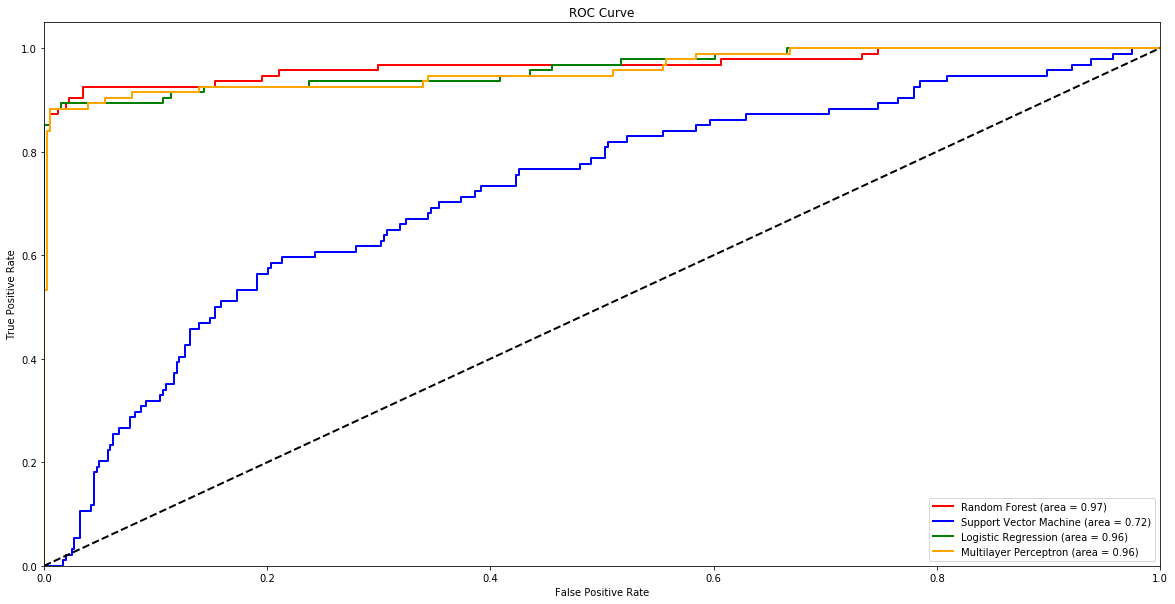

In [49]:
plt.figure()
plt.plot(rf_fpr, rf_tpr, color='red',lw=2,
         label='Random Forest (area = %0.2f)' % rf_roc_auc)

plt.plot(svm_fpr, svm_tpr, color='blue',lw=2, 
         label='Support Vector Machine (area = %0.2f)' % svm_roc_auc)

plt.plot(lr_fpr, lr_tpr, color='green',lw=2, 
         label='Logistic Regression (area = %0.2f)' % lr_roc_auc)

plt.plot(mlp_fpr, mlp_tpr, color='orange',lw=2, 
         label='Multilayer Perceptron (area = %0.2f)' % mlp_roc_auc)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()